In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import scipy.stats as stats


# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE


from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
df_fraud = pd.read_csv('fraud_oracle.csv')

In [5]:
df_fraud.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [6]:
df_fraud.head(1).T

0
Month                               Dec
WeekOfMonth                           5
DayOfWeek                     Wednesday
Make                              Honda
AccidentArea                      Urban
DayOfWeekClaimed                Tuesday
MonthClaimed                        Jan
WeekOfMonthClaimed                    1
Sex                              Female
MaritalStatus                    Single
Age                                  21
Fault                     Policy Holder
PolicyType            Sport - Liability
VehicleCategory                   Sport
VehiclePrice            more than 69000
FraudFound_P                          0
PolicyNumber                          1
RepNumber                            12
Deductible                          300
DriverRating                          1
Days_Policy_Accident       more than 30
Days_Policy_Claim          more than 30
PastNumberOfClaims                 none
AgeOfVehicle                    3 years
AgeOfPolicyHolder              26 to 30
PoliceReportFiled                    No
WitnessPresent                       No
AgentType                      External
NumberOfSuppliments                none
AddressChange_Claim              1 year
NumberOfCars                     3 to 4
Year                               1994
BasePolicy                    Liability

In [7]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
# Average age of Policy holder is 40
# Average Deductible amount is 407.7
# "Deductible":-Deductible is the amount that a policy holder has to pay before the 
# insurance company starts paying up

In [10]:
null_values = df_fraud.isnull().sum()
null_values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [11]:
# There are no null value in the dataset.

# duplicate value detection

In [12]:
df_fraud[df_fraud.duplicated()]

Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, FraudFound_P, PolicyNumber, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy]
Index: []

In [13]:
check_duplicates= df_fraud.duplicated()
check_duplicates.sum()

0

In [14]:
#sum is zero hence there are no duplicate values

In [15]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [16]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekCla

In [17]:
#dropping columns with same relations
df_fraud.drop('AgeOfPolicyHolder',axis=1,inplace=True)

# Feature engineering

In [18]:
df_fraud["AgeOfVehicle"].value_counts()

7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64

In [19]:
def new_cat(val):
    if val=="more than 7":
        return "8"
    elif val=="new":
        return "1"
    else:
        return (val.split()[0])
df_fraud["AgeOfVehicle"]=df_fraud["AgeOfVehicle"].apply(new_cat)      

In [20]:
df_fraud["AgeOfVehicle"].value_counts()

7    5807
8    3981
6    3448
5    1357
1     373
4     229
3     152
2      73
Name: AgeOfVehicle, dtype: int64

In [21]:
df_fraud['VehiclePrice'].value_counts()

20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64

In [22]:
def new_cat1(val1):
    if val1=="60000 to 69000"or val1=="more than 69000":
        return "more than 60000"
    elif val1=="20000 to 29000"or val1=="30000 to 39000":
        return "20000 to 39000"
    else:
        return val1
df_fraud['VehiclePrice']=df_fraud['VehiclePrice'].apply(new_cat1)   

In [23]:
df_fraud['VehiclePrice'].value_counts()

20000 to 39000     11612
more than 60000     2251
less than 20000     1096
40000 to 59000       461
Name: VehiclePrice, dtype: int64

In [24]:
df_fraud['Days_Policy_Accident'].value_counts()

more than 30    15247
8 to 15            55
none               55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

In [25]:
def new_cat2(val2):
    if val2=="1 to 7":
        return "less than 8"
    elif val2=="15 to 30":
        return "16 to 30"
    else:
        return val2
df_fraud['Days_Policy_Accident']=df_fraud['Days_Policy_Accident'].apply(new_cat2) 

In [26]:
df_fraud['Days_Policy_Accident'].value_counts()

more than 30    15247
8 to 15            55
none               55
16 to 30           49
less than 8        14
Name: Days_Policy_Accident, dtype: int64

In [27]:
df_fraud['Days_Policy_Claim'].value_counts()

more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64

In [28]:
def new_cat3(val3):
    if val3=="15 to 30":
        return "16 to 30"
    else:
        return val3
df_fraud['Days_Policy_Claim']=df_fraud['Days_Policy_Claim'].apply(new_cat3)   

In [29]:
df_fraud['Days_Policy_Claim'].value_counts()

more than 30    15342
16 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64

In [30]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [31]:
df_fraud['DayOfWeekClaimed'].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [32]:
# removing unsual zero value
df_fraud=df_fraud[~(df_fraud['DayOfWeekClaimed']=="0")]

In [33]:
df_fraud['DayOfWeekClaimed'].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

In [34]:
# conversion of data type.
df_fraud['WeekOfMonth'] = df_fraud['WeekOfMonth'].astype('object')
df_fraud['WeekOfMonthClaimed'] = df_fraud['WeekOfMonthClaimed'].astype('object')
df_fraud['FraudFound_P'] = df_fraud['FraudFound_P'].astype('object')
df_fraud['PolicyNumber'] = df_fraud['PolicyNumber'].astype('object')
df_fraud['RepNumber'] = df_fraud['RepNumber'].astype('object')
df_fraud['Year'] = df_fraud['Year'].astype('object')
df_fraud["AgeOfVehicle"] =df_fraud["AgeOfVehicle"].astype('int64')

In [35]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  object
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  object
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

In [36]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1256
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
3    3640
2    3557
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
Monday       2615
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2800
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1597
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

# Outlier detection

In [37]:
df_fraud.describe()

Age   Deductible  DriverRating  AgeOfVehicle
count 15419.000000 15419.000000  15419.000000  15419.000000
mean     39.858292   407.704780      2.487840      6.606135
std      13.488996    43.952379      1.119482      1.398975
min       0.000000   300.000000      1.000000      1.000000
25%      31.000000   400.000000      1.000000      6.000000
50%      38.000000   400.000000      2.000000      7.000000
75%      48.000000   400.000000      3.000000      8.000000
max      80.000000   700.000000      4.000000      8.000000

<AxesSubplot:>

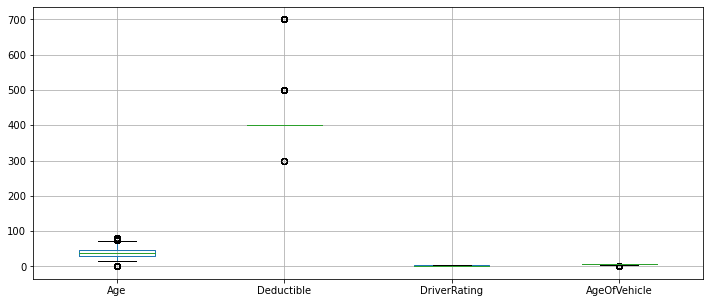

In [38]:
plt.figure(figsize=(12,5))

df_fraud.boxplot()

In [39]:
# Boxplot shows present of outliers in the Age column and hence shoukd be treated in order to reduce noise in the data and also for correct statistical valuation 


In [40]:
df_fraud.select_dtypes(include="number")

Age  Deductible  DriverRating  AgeOfVehicle
0       21         300             1             3
1       34         400             4             6
2       47         400             3             7
3       65         400             2             8
4       27         400             1             5
5       20         400             3             5
6       36         400             1             7
7        0         400             4             1
8       30         400             4             6
9       42         400             1             8
10      71         400             3             8
11      52         400             1             8
12      28         400             1             7
13       0         400             3             1
14      61         400             1             8
15      38         400             1             6
16      41         400             4             7
17      28         400             1             7
18      32         400             1             7
19      30         400             2             6
20      40         400             1             8
21      47         400             2             8
22      63         400             3             8
23      31         400             3             6
24      45         400             3             8
25      60         400             4             8
26      21         400             2             5
27      42         400             3             7
28       0         400             1             1
29      39         400             3             7
30      47         400             1             8
31       0         400             1             1
32      42         400             3             7
33      30         400             4             6
34      42         400             1             7
35      34         400             3             7
36      30         400             4             6
37      27         400             2             7
38      55         400             1             8
39      35         400             3             7
40      35         400             1             6
41      44         400             1             7
42      42         400             4             4
43      41         400             2             7
44      72         400             1             8
45      29         400             3             5
46      32         400             4             6
47      37         400             3             5
48      37         400             1             6
49      59         400             4             8
50      49         400             2             8
51      27         500             3             6
52      21         400             4             4
53      50         400             1             8
54      45         400             1             7
55      49         400             4             8
56      30         400             4             6
57      37         400             3             7
58       0         400             4             1
59      27         400             4             6
60      30         400             4             5
61      49         400             4             8
62       0         400             2             1
63      26         400             3             7
64      48         400             1             7
65      31         400             3             7
66      40         400             2             7
67      65         400             1             8
68      64         400             1             8
69      55         400             2             7
70      44         400             1             7
71      27         400             3             6
72      28         400             3             5
73      47         400             2             8
74      60         400             3             7
75      33         400             4             6
76      27         400             3             6
77      47         400       

In [41]:
cont=df_fraud[["Age","DriverRating"]].columns

In [42]:
cont

Index(['Age', 'DriverRating'], dtype='object')

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    return lower_range,upper_range

In [44]:
for column in df_fraud[cont].columns:
    lr,ur = remove_outlier(df_fraud[column])
    df_fraud[column] = np.where(df_fraud[column]>ur,ur,df_fraud[column])
    df_fraud[column] = np.where(df_fraud[column]<lr,lr,df_fraud[column])

<AxesSubplot:>

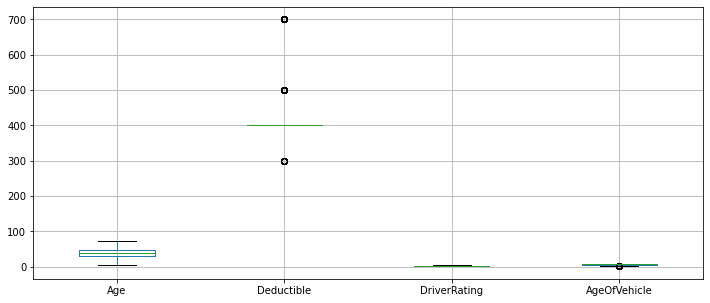

In [45]:
plt.figure(figsize=(12,5))
df_fraud.boxplot()

In [46]:
#Outliers are removed from the data.

# Analysis of the Data

In [47]:
df_fraud_cat=df_fraud.select_dtypes(include="object")

In [48]:
df_fraud_num=df_fraud.select_dtypes(include="number")

<Figure size 864x360 with 0 Axes>

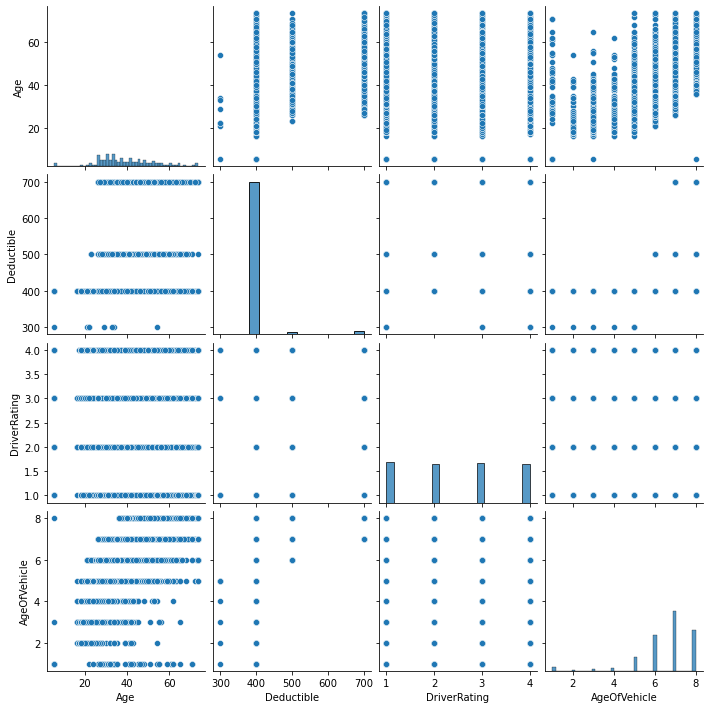

In [49]:
plt.figure(figsize=(12,5))
sns.pairplot(df_fraud_num)

In [50]:
# removing columns for the sake of better analysis.
df_fraud_cat.drop(['FraudFound_P','PolicyNumber','RepNumber'],axis=1,inplace=True)

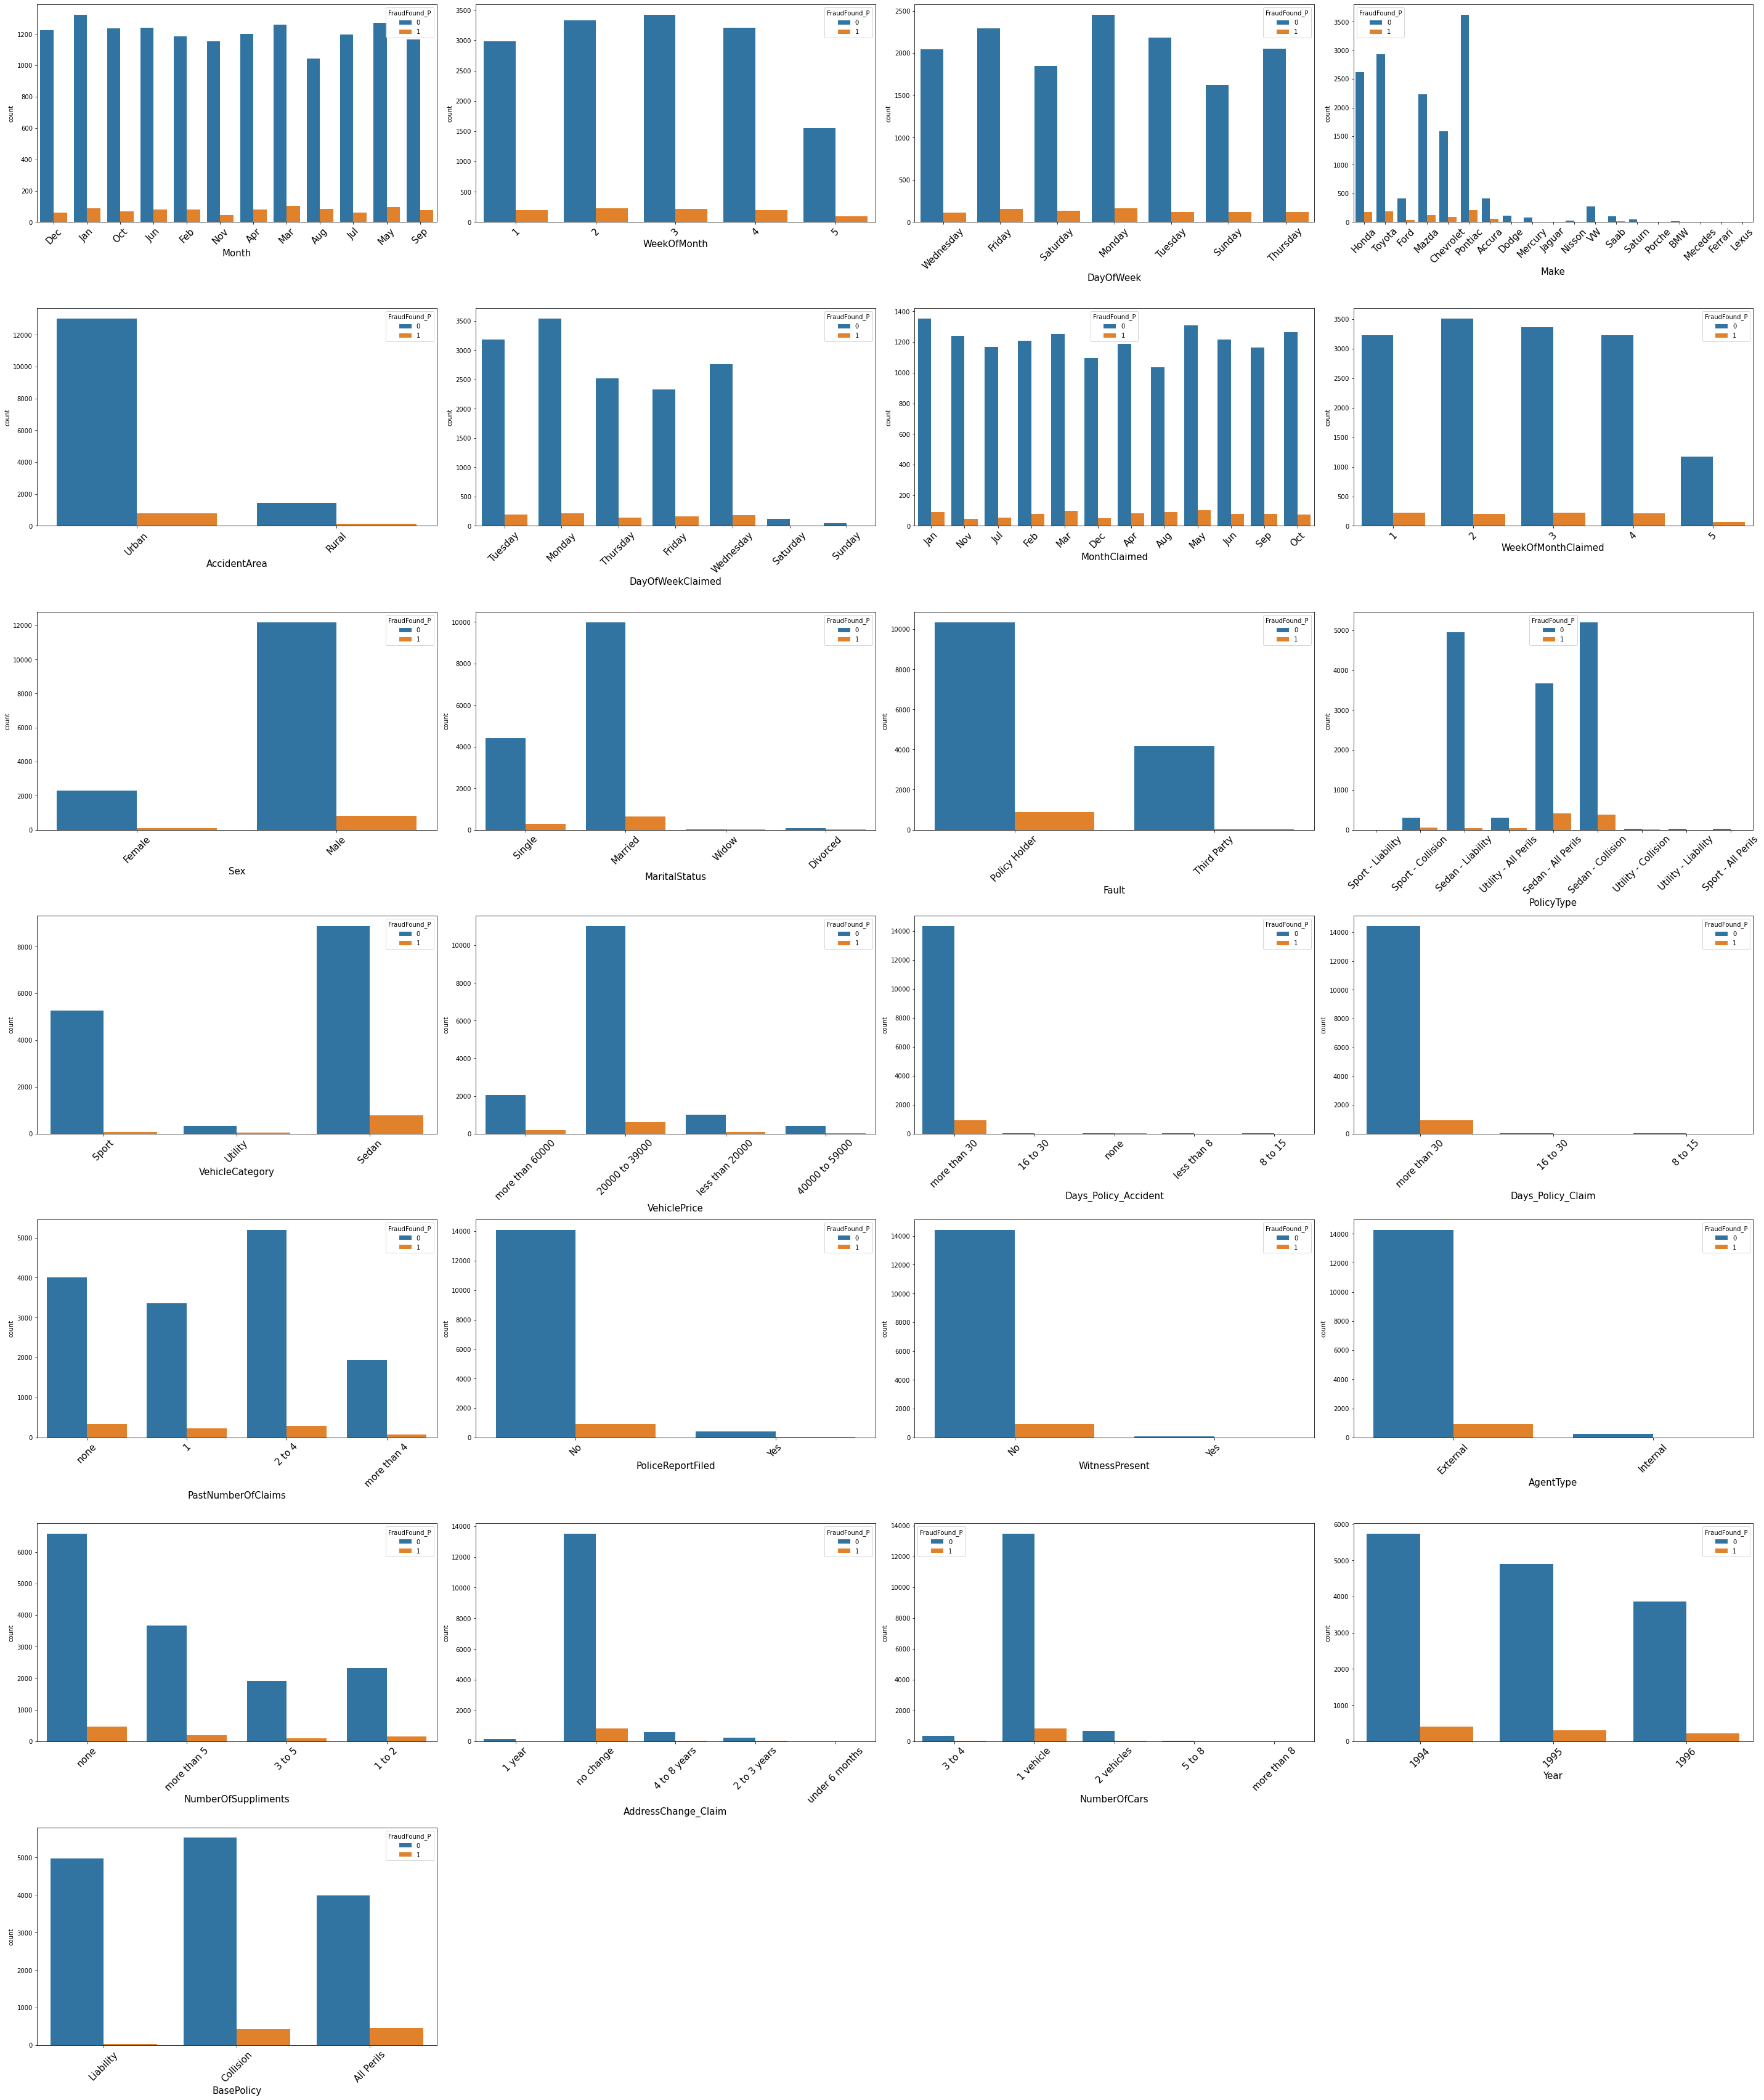

In [51]:
count=1
plt.subplots(figsize=(40,60))
for i in df_fraud_cat.columns:
    plt.subplot(9,4,count)
    sns.countplot(hue=df_fraud["FraudFound_P"],x=i,data=df_fraud_cat)
    plt.xlabel(i,fontsize=15)
    plt.xticks(rotation=45,fontsize=15)
    count+=1
    
    
plt.tight_layout()
plt.show()

# Inferences

In [52]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [53]:
df_fraud.head()

Month WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec           5  Wednesday   Honda        Urban          Tuesday   
1   Jan           3  Wednesday   Honda        Urban           Monday   
2   Oct           5     Friday   Honda        Urban         Thursday   
3   Jun           2   Saturday  Toyota        Rural           Friday   
4   Jan           5     Monday   Honda        Urban          Tuesday   

  MonthClaimed WeekOfMonthClaimed     Sex MaritalStatus       Age  \
0          Jan                  1  Female        Single 21.000000   
1          Jan                  4    Male        Single 34.000000   
2          Nov                  2    Male       Married 47.000000   
3          Jul                  1    Male       Married 65.000000   
4          Feb                  2  Female        Single 27.000000   

           Fault         PolicyType VehicleCategory     VehiclePrice  \
0  Policy Holder  Sport - Liability           Sport  more than 60000   
1  Policy Holder  Sport - Collision           Sport  more than 60000   
2  Policy Holder  Sport - Collision           Sport  more than 60000   
3    Third Party  Sedan - Liability           Sport   20000 to 39000   
4    Third Party  Sport - Collision           Sport  more than 60000   

  FraudFound_P PolicyNumber RepNumber  Deductible  DriverRating  \
0            0            1        12         300      1.000000   
1            0            2        15         400      4.000000   
2            0            3         7         400      3.000000   
3            0            4         4         400      2.000000   
4            0            5         3         400      1.000000   

  Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims  AgeOfVehicle  \
0         more than 30      more than 30               none             3   
1         more than 30      more than 30               none             6   
2         more than 30      more than 30                  1             7   
3         more than 30      more than 30                  1             8   
4         more than 30      more than 30               none             5   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

# Significance Variables:

In [54]:
df_fraud_1 = df_fraud

In [55]:
df_fraud_1['FraudFound_P'] = df_fraud_1['FraudFound_P'].replace({0:'Not_Found',1:'Found'})

In [56]:
df_fraud_1['FraudFound_P'].unique()

array(['Not_Found', 'Found'], dtype=object)

# Relationship Between Age of Vehicle and Target variable

In [57]:
#Ho: Not Significant
#Ha: Significant

In [58]:
df_fraud_1.head()

Month WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec           5  Wednesday   Honda        Urban          Tuesday   
1   Jan           3  Wednesday   Honda        Urban           Monday   
2   Oct           5     Friday   Honda        Urban         Thursday   
3   Jun           2   Saturday  Toyota        Rural           Friday   
4   Jan           5     Monday   Honda        Urban          Tuesday   

  MonthClaimed WeekOfMonthClaimed     Sex MaritalStatus       Age  \
0          Jan                  1  Female        Single 21.000000   
1          Jan                  4    Male        Single 34.000000   
2          Nov                  2    Male       Married 47.000000   
3          Jul                  1    Male       Married 65.000000   
4          Feb                  2  Female        Single 27.000000   

           Fault         PolicyType VehicleCategory     VehiclePrice  \
0  Policy Holder  Sport - Liability           Sport  more than 60000   
1  Policy Holder  Sport - Collision           Sport  more than 60000   
2  Policy Holder  Sport - Collision           Sport  more than 60000   
3    Third Party  Sedan - Liability           Sport   20000 to 39000   
4    Third Party  Sport - Collision           Sport  more than 60000   

  FraudFound_P PolicyNumber RepNumber  Deductible  DriverRating  \
0    Not_Found            1        12         300      1.000000   
1    Not_Found            2        15         400      4.000000   
2    Not_Found            3         7         400      3.000000   
3    Not_Found            4         4         400      2.000000   
4    Not_Found            5         3         400      1.000000   

  Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims  AgeOfVehicle  \
0         more than 30      more than 30               none             3   
1         more than 30      more than 30               none             6   
2         more than 30      more than 30                  1             7   
3         more than 30      more than 30                  1             8   
4         more than 30      more than 30               none             5   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [59]:
Found = df_fraud_1[df_fraud_1['FraudFound_P'] == 'Found']['AgeOfVehicle']

In [60]:
Not_Found = df_fraud_1[df_fraud_1['FraudFound_P'] == 'Not_Found']['AgeOfVehicle']

In [61]:
stats.ttest_ind(Found,Not_Found)

Ttest_indResult(statistic=-4.138566497432321, pvalue=3.513389801167973e-05)

In [62]:
pvalue = 3.513389801167973e-05
if pvalue < 0.05:
    print('Ha is Selected')
else:
    print('Ho  is selected')

Ha is Selected


In [63]:
# Age Of Vehicle is a significant variable.

In [64]:
df_fraud_1.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [65]:
df_fraud_1['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

# Relationship Between AccidentArea and Target Variable

In [66]:
#Ho: Not Significant
#Ha: Significant

In [67]:
obs_value = pd.crosstab(df_fraud_1['AccidentArea'],df_fraud_1['FraudFound_P'])

In [68]:
obs_value

FraudFound_P  Found  Not_Found
AccidentArea                  
Rural           133       1464
Urban           790      13032

In [69]:
stats.chi2_contingency(obs_value)

(16.90185792883344,
 3.9363035441822304e-05,
 1,
 array([[   95.59835268,  1501.40164732],
        [  827.40164732, 12994.59835268]]))

In [70]:
pvalue = 3.9363035441822304e-05 
if pvalue < 0.05:
    print('Ha is Selected')
else:
    print('Ho  is selected')

Ha is Selected


In [71]:
# AccidentArea is a significant Variable

# Relationship Between Fault and Target Variable

In [72]:
#Ho: Not Significant
#Ha: Significant

In [73]:
df_fraud_1['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [74]:
obs_value1 = pd.crosstab(df_fraud_1['Fault'],df_fraud_1['FraudFound_P'])

In [75]:
obs_value1

FraudFound_P   Found  Not_Found
Fault                          
Policy Holder    886      10343
Third Party       37       4153

In [76]:
stats.chi2_contingency(obs_value1)

(264.98455565422495,
 1.4061798322083448e-59,
 1,
 array([[  672.18152928, 10556.81847072],
        [  250.81847072,  3939.18152928]]))

In [77]:
pvalue = 1.4061798322083448e-59
if pvalue < 0.05:
    print('Ha is Selected')
else:
    print('Ho  is selected')

Ha is Selected


In [78]:
# Fault is a significant Variable

# Relationship Between PolicyType and Target variable

In [79]:
#Ho: Not Significant
#Ha: Significant

In [80]:
df_fraud_1['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [81]:
obs_value2 = pd.crosstab(df_fraud_1['PolicyType'],df_fraud_1['FraudFound_P'])

In [82]:
obs_value2

FraudFound_P          Found  Not_Found
PolicyType                            
Sedan - All Perils      411       3675
Sedan - Collision       384       5200
Sedan - Liability        36       4951
Sport - All Perils        0         22
Sport - Collision        48        300
Sport - Liability         0          1
Utility - All Perils     41        299
Utility - Collision       3         27
Utility - Liability       0         21

In [83]:
stats.chi2_contingency(obs_value2)

(437.49138121778026,
 1.7684408625067324e-89,
 8,
 array([[2.44592905e+02, 3.84140710e+03],
        [3.34264998e+02, 5.24973500e+03],
        [2.98527855e+02, 4.68847214e+03],
        [1.31694662e+00, 2.06830534e+01],
        [2.08317011e+01, 3.27168299e+02],
        [5.98612102e-02, 9.40138790e-01],
        [2.03528115e+01, 3.19647189e+02],
        [1.79583631e+00, 2.82041637e+01],
        [1.25708541e+00, 1.97429146e+01]]))

In [84]:
pvalue = 1.7684408625067324e-89
if pvalue < 0.05:
    print('Ha is Selected')
else:
    print('Ho  is selected')

Ha is Selected


In [85]:
# PolicyType is a significant variable

# Multicollinearity

In [86]:
continous = df_fraud_1.select_dtypes(include='int64')

<AxesSubplot:>

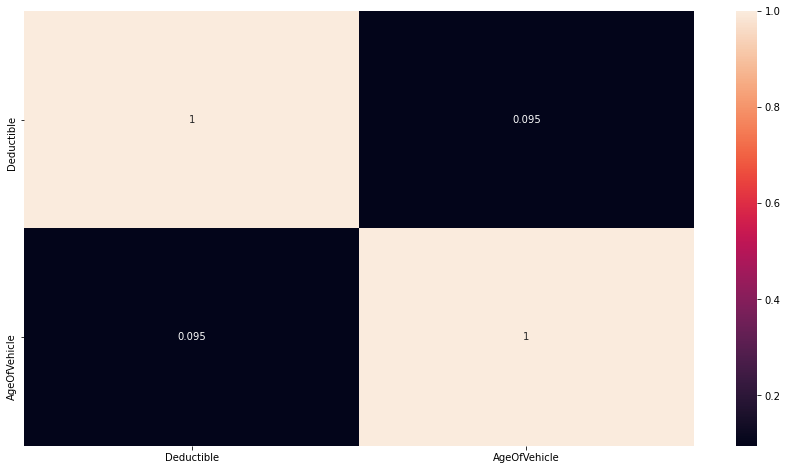

In [87]:
sns.heatmap(continous.corr(),annot = True)

In [88]:
# data is positively collinear.

                                                        ****END****

# Interim Presentation

Descriptive  analysis and Statistical significance has been checked for now,later Model will be built using Logistic Regression.

Feature Engineering

In [89]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import statsmodels.tsa.api as smt


from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_absolute_error
from skimage.metrics import mean_squared_error

In [90]:
from sklearn.preprocessing import StandardScaler

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [91]:
df_fraud = pd.read_csv('fraud_oracle.csv')

In [92]:
df_fraud.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [93]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

<AxesSubplot:xlabel='Deductible', ylabel='Density'>

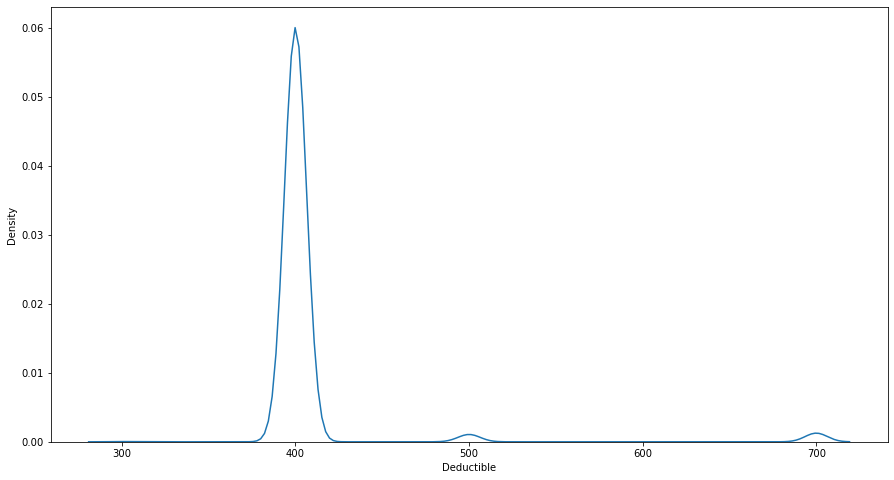

In [94]:
sns.kdeplot(df_fraud['Deductible'])

In [95]:
df_fraud_object = df_fraud.select_dtypes(include = 'object')

In [96]:
df_fraud_object.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [97]:
X_object = pd.get_dummies(data=df_fraud_object,columns = df_fraud_object.columns,drop_first=True)

In [98]:
X_object.shape

(15420, 116)

In [99]:
X_int = df_fraud.select_dtypes(include=[np.number]).drop('FraudFound_P',axis=1)

In [100]:
X_int.shape

(15420, 8)

In [101]:
X_int.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [102]:
SS = StandardScaler()

In [103]:
X_int_scaled = SS.fit_transform(X_int[X_int.columns])

In [104]:
X_int_scaled = pd.DataFrame(X_int_scaled)

In [105]:
X_int_scaled.head()

0         1         2         3         4         5         6  \
0  1.717545 -1.345408 -1.397554 -1.731938  0.764540 -2.450633 -1.329092   
1  0.164199  1.037295 -0.434015 -1.731714  1.416743 -0.175298  1.350875   
2  1.717545 -0.551174  0.529523 -1.731489 -0.322464 -0.175298  0.457553   
3 -0.612473 -1.345408  1.863653 -1.731265 -0.974666 -0.175298 -0.435770   
4  1.717545 -0.551174 -0.952844 -1.731040 -1.192067 -0.175298 -1.329092   

          7  
0 -1.078658  
1 -1.078658  
2 -1.078658  
3 -1.078658  
4 -1.078658

In [106]:
X = pd.concat([X_object,X_int_scaled],axis=1)

In [107]:
X.shape

(15420, 124)

In [108]:
X = pd.DataFrame(X)

In [109]:
X.shape

(15420, 124)

In [110]:
y = SS.fit_transform(df_fraud[['FraudFound_P']])

In [111]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [112]:
x = df_fraud.drop('FraudFound_P',axis=1)
y = df_fraud['FraudFound_P']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [115]:
# x=X[signi_feat_rfe]
# x = sm.add_constant(x)
# y = df_fraud['FraudFound_P'] 

In [116]:
df_fraud.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [117]:
X_int_scaled.head()

0         1         2         3         4         5         6  \
0  1.717545 -1.345408 -1.397554 -1.731938  0.764540 -2.450633 -1.329092   
1  0.164199  1.037295 -0.434015 -1.731714  1.416743 -0.175298  1.350875   
2  1.717545 -0.551174  0.529523 -1.731489 -0.322464 -0.175298  0.457553   
3 -0.612473 -1.345408  1.863653 -1.731265 -0.974666 -0.175298 -0.435770   
4  1.717545 -0.551174 -0.952844 -1.731040 -1.192067 -0.175298 -1.329092   

          7  
0 -1.078658  
1 -1.078658  
2 -1.078658  
3 -1.078658  
4 -1.078658

In [118]:
y_scaled = SS.fit_transform(df_fraud[['FraudFound_P']])

In [119]:
X_int_scaled = sm.add_constant(X_int_scaled)

In [120]:
X.shape

(15420, 124)

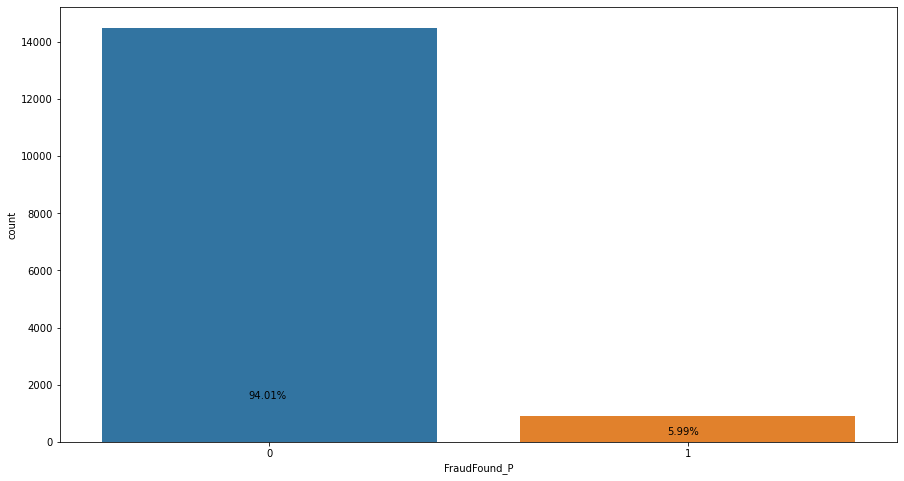

In [121]:
# consider only the target variable
df_target = df_fraud['FraudFound_P'].copy()

df_target.value_counts()

sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
# plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
# plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.text(x = -0.05, y = 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = 250, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# to show the plot
plt.show()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (10794, 124)
y_train (10794,)
X_test (4626, 124)
y_test (4626,)


In [123]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

dtc_pred = dtc.predict(X_test)

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, dtc_pred))
print("F1_Score:",metrics.f1_score(y_test, dtc_pred))
print("")
print(classification_report(y_test, dtc_pred))

Accuracy: 0.9120190229139645
F1_Score: 0.3136593591905565

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4349
           1       0.29      0.34      0.31       277

    accuracy                           0.91      4626
   macro avg       0.63      0.64      0.63      4626
weighted avg       0.92      0.91      0.91      4626



In [125]:
cnf_matrix = metrics.confusion_matrix(y_test, dtc_pred)
cnf_matrix

array([[4126,  223],
       [ 184,   93]], dtype=int64)

Text(0.5, 510.88, 'Predicted label')

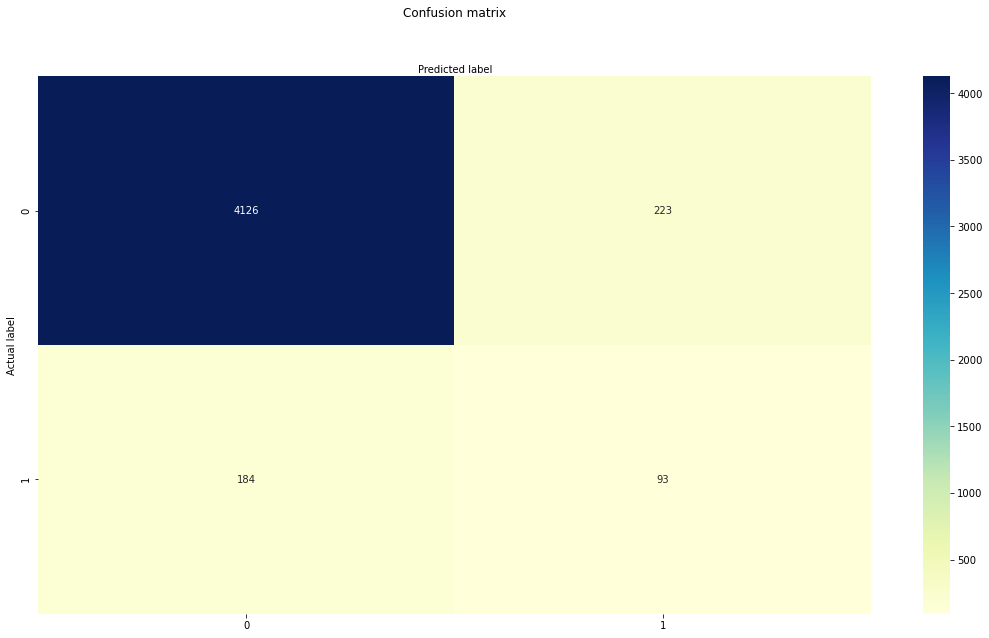

In [126]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 4139 and 91 are actual predictions, and 210 and 186 are incorrect predictions.

In [127]:
# # here Class name 0=  'Rejected'   and class name1="Approved"

# from sklearn import tree
# fig = plt.figure(figsize=(25,20))

# _ = tree.plot_tree(dtc,
#                    feature_names = X_test.columns,  
#                    class_names=["0","1"],
#                    filled=True)

# #  Slides 38 to 51
